Retail Sales Python Sales Data Analysis Project

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df = pd.read_csv('retail_sales_dataset.csv')

In [8]:
df.head()
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [13]:
df.describe()

,transaction_id,age,quantity,price_per_unit,total_amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [11]:
# Columns

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [12]:
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')

In [50]:
df['date'] = pd.to_datetime(df['date'])

In [51]:
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df['Day'] = df['date'].dt.day

In [18]:
df['gender'] = df['gender'].str.strip().str.capitalize()

In [19]:
# Saels By Gender

gender_sales = df.groupby('gender')['total_amount'].sum()

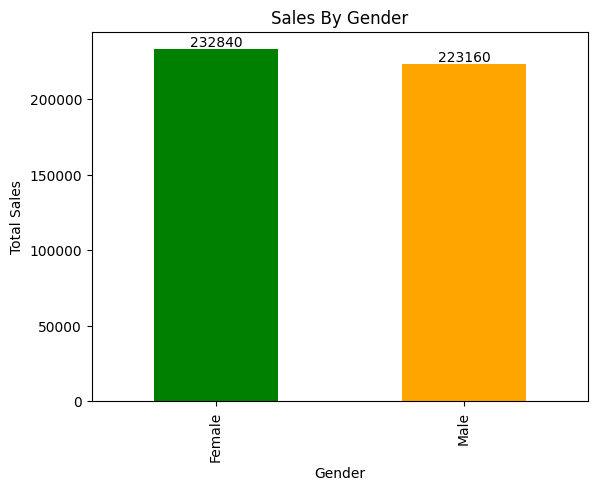

In [28]:
ax = gender_sales.plot(kind='bar',title='Sales By Gender',color=['green','orange'])
plt.xlabel('Gender')
plt.ylabel('Total Sales')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Male Customers Spend Slightly More Than Female Customers

In [30]:
# Sales By Category

sales_category = df.groupby('product_category')['total_amount'].sum()

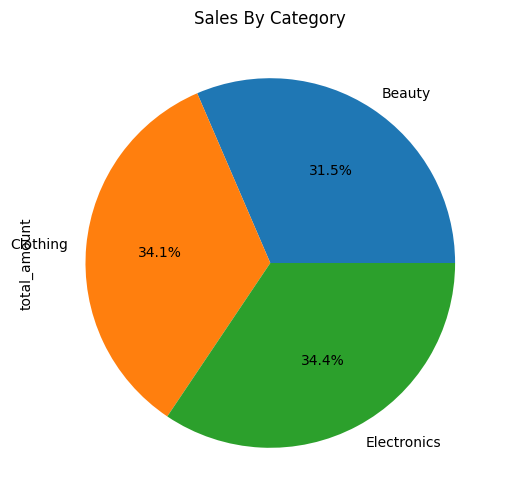

In [35]:
ax = sales_category.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6))
plt.title('Sales By Category')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Electronics Generate The Highest Revenue

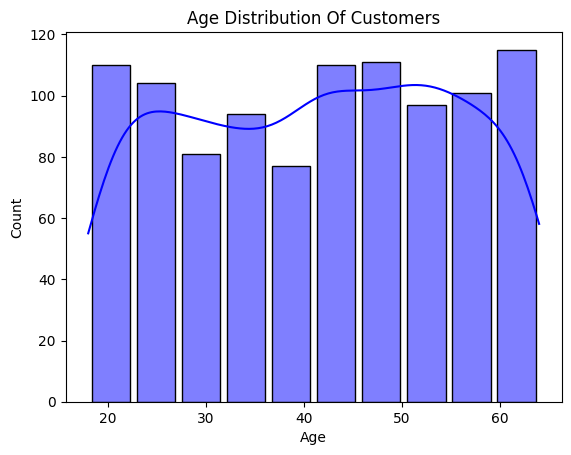

In [45]:
plt.Figure(figsize=(8,5))
sns.histplot(df['age'], bins=10,kde=True,color='blue',edgecolor='black',shrink=0.85)
plt.title('Age Distribution Of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Monthly Sales Trend
monthly_sales = df.groupby('Month')['total_amount'].sum()

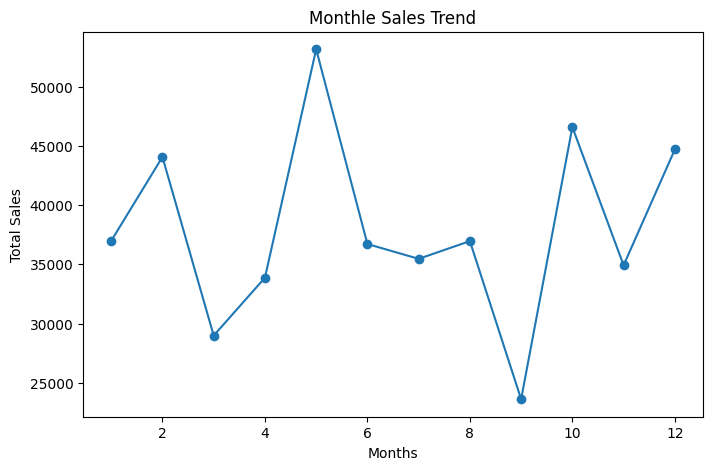

In [56]:
plt.figure(figsize=(8,5))
monthly_sales.plot(marker='o')
plt.title('Monthle Sales Trend')
plt.xlabel('Months')
plt.ylabel('Total Sales')

plt.show()


Certain Months Show Higher Sales Peaks

In [61]:
top_customers = df.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head(10)
print(top_customers)

customer_id
CUST946    2000
CUST626    2000
CUST634    2000
CUST773    2000
CUST420    2000
CUST416    2000
CUST743    2000
CUST742    2000
CUST595    2000
CUST065    2000
Name: total_amount, dtype: int64
